# Bank-Marketing
Creating a logistic regression model using python on a bank data, to find out if the customer have subscribed to a specific plan or not.

## Problem Statement
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In this project, you need to build a model for deciding whether a campaign will be successful in getting a client to sign up for the term deposits.

## Dataset
The dataset is in the form of a csv file and the link to download is given below:
https://cdn.upgrad.com/UpGrad/temp/e4993de3-06a6-4c7d-b12f-774ce36b592e/bank.csv

## Data Description
Bank client data

- age (numeric)
- job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education: (categorical "unknown","secondary","primary","tertiary")
- default: has credit in default? (binary: "yes","no")
- balance: average yearly balance, in euros (numeric)
- housing: has housing loan? (binary: "yes","no")
- loan: has personal loan? (binary: "yes","no")


### Data related to the last contact of the current campaign

- contact: contact communication type (categorical: "unknown","telephone","cellular")
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- duration: last contact duration, in seconds (numeric)

### Other attributes:

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Output variable (desired target):

- y: has the client subscribed a term deposit? (binary: "yes","no")

## Objectives
You are required to prepare a well-commented an interactive python notebook as your solution to this problem statement. The notebook must meet the following objectives:

- Clean the data and drop useless columns.
- Make an EDA report, i.e., perform a univariate and bivariate analysis. Also, derive new features based on the given features, remove outliers and correlated variables if necessary.
- Visualize the distributions of various features and correlations between them.
- Perform feature engineering to extract the correct features for the model.
- Build a logistic regression model
- Evaluate the model used.

## Model Evaluation
When you're done with the model building and residual analysis and have made predictions on the test set, just make sure you use y_test and y_pred.

where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set. Also, remember if the VIF for the selected features is not coming high always check the p-values of the variables before applying the model on test data.

# Logistic Regression Assignment

## Total Marks: 100

## Instructions:
- This assignment is designed to test your ability to build and evaluate a logistic regression model using the given dataset.
- Follow the steps provided and answer each question with proper analysis and visualizations.
- Ensure that you add comments explaining each step in your code.
- Submit your completed Jupyter Notebook file.

---








### Submission Guidelines:
- Ensure your notebook is well-structured and properly commented.
- Submit the completed Jupyter Notebook (.ipynb) file.




## Grading Criteria:
1. **Data Loading & Inspection** - 10 marks
2. **Data Cleaning** - 10 marks
3. **Descriptive Statistics** - 10 marks
4. **Univariate Analysis** - 10 marks
5. **Bivariate Analysis** - 10 marks
6. **Multivariate Analysis** - 10 marks
7. **Heatmap & Correlation Analysis** - 10 marks
8. **Building Logistic Regression Model** - 15 marks
9. **Model Evaluation & Interpretation** - 10 marks
10. **Final Conclusion** - 5 marks

---


## Questions:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report


### 1. Load the Data (5 marks)
- Load the dataset into a Pandas DataFrame.
- Display the first five rows to understand the structure.
- Check for missing values.

In [ ]:
df=pd.read_csv("C:/Users/New User/Python/nit/demos/data/bank.csv")
df.head()
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.describe().transpose()
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


### 2. Data Inspection (5 marks)
- Display the data types of all columns.
- Check for duplicate values and handle them if necessary.
- Identify the target variable.

In [ ]:
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


np.int64(0)


### 3. Data Cleaning (10 marks)
- Handle missing values appropriately.
- Check for outliers using box plots.
- Perform any necessary transformations.

In [ ]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

### 4. Descriptive Statistics (10 marks)
- Generate summary statistics for numerical variables.
- Provide insights on the distribution of key variables.

In [ ]:
df.describe().transpose()
# Age --- right skewed
# balance --- right skewed


,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


### 5. Univariate Analysis (10 marks)
- Perform and visualize univariate analysis on each column separately.
- Use histograms, boxplots, and value counts where applicable.

In [ ]:
def count_plot1(df,column):
    sns.countplot(x=column,data=df)
    plt.title(f"Count plot for categorical column ${column}")
    plt.xticks(rotation=90)
    plt.show()

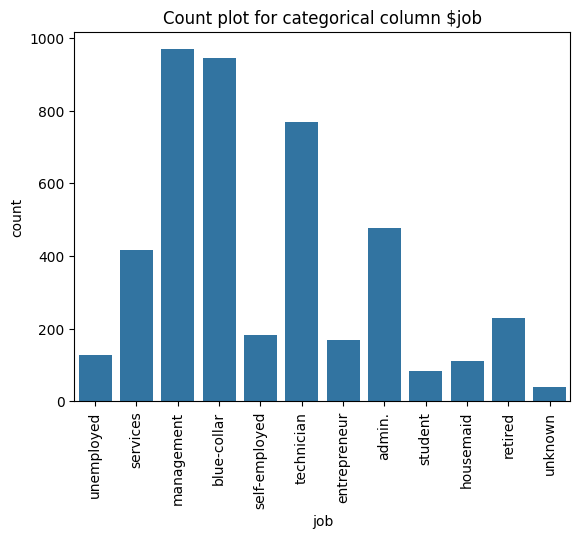

job
management       21.433311
blue-collar      20.924574
technician       16.987392
admin.           10.572882
services          9.223623
retired           5.087370
self-employed     4.047777
entrepreneur      3.715992
unemployed        2.831232
housemaid         2.477328
student           1.857996
unknown           0.840522
Name: proportion, dtype: float64

In [ ]:
count_plot1(df,'job')
df['job'].value_counts(normalize=True).mul(100)

# People belonging to management and blue-collar are the ones major in this dataset

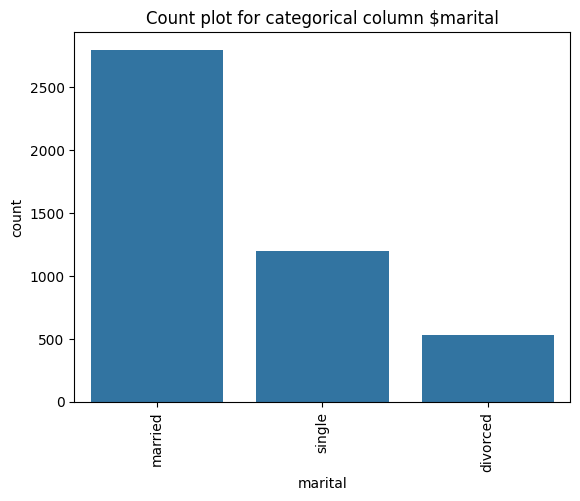

marital
married     61.866844
single      26.454324
divorced    11.678832
Name: proportion, dtype: float64

In [ ]:
count_plot1(df,'marital')
df['marital'].value_counts(normalize=True).mul(100)

# People belonging to married profile are the ones major in this dataset around 61%

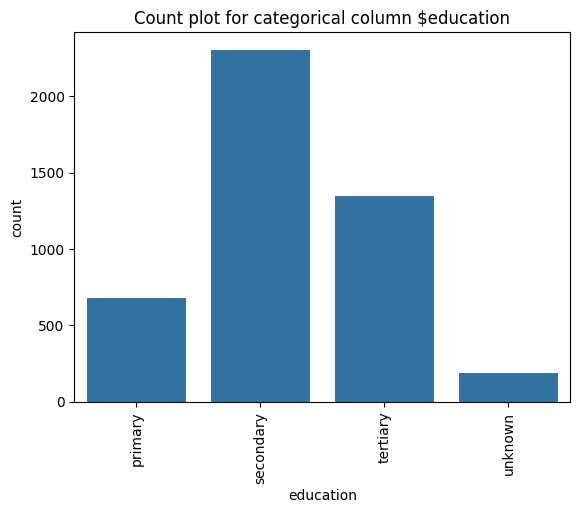

education
secondary    51.006415
tertiary     29.860650
primary      14.996682
unknown       4.136253
Name: proportion, dtype: float64

In [ ]:
count_plot1(df,'education')
df['education'].value_counts(normalize=True).mul(100)

# People belonging to secoundary education are the ones major in this dataset around 51%

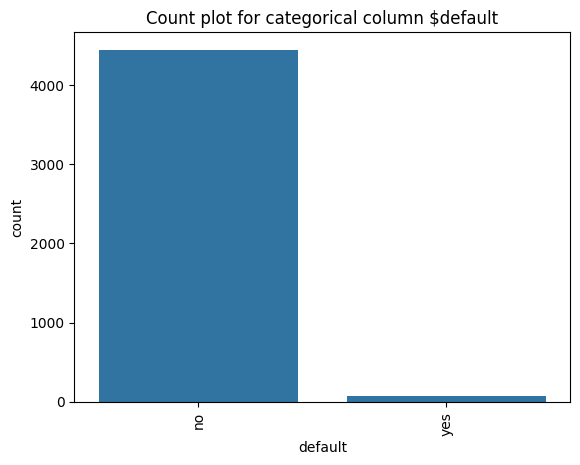

default
no     98.318956
yes     1.681044
Name: proportion, dtype: float64

In [ ]:
count_plot1(df,'default')
df['default'].value_counts(normalize=True).mul(100)

# People with no default credit history are more in dataset

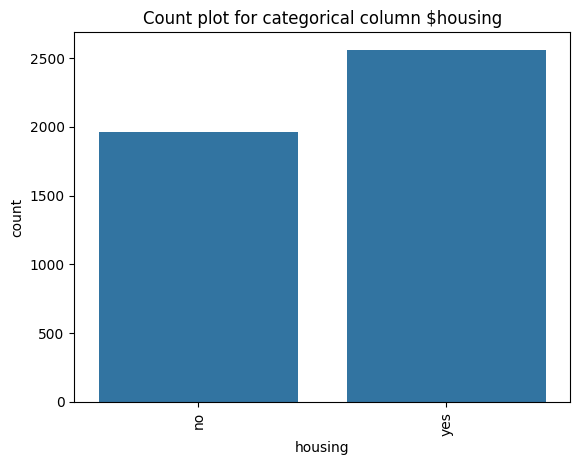

housing
yes    56.602522
no     43.397478
Name: proportion, dtype: float64

In [ ]:
count_plot1(df,'housing')
df['housing'].value_counts(normalize=True).mul(100)

# People having housing loan are more around 56.6%

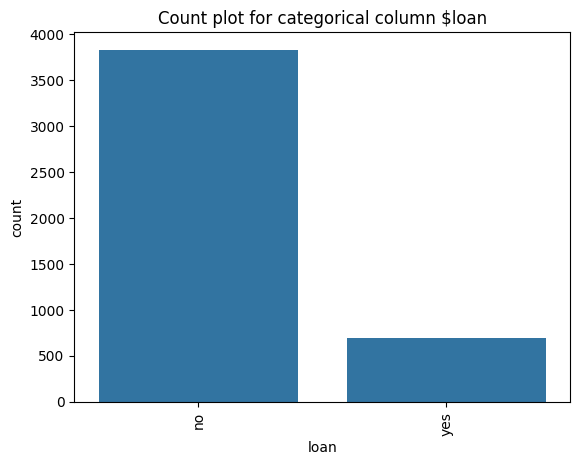

loan
no     84.715771
yes    15.284229
Name: proportion, dtype: float64

In [ ]:
count_plot1(df,'loan')
df['loan'].value_counts(normalize=True).mul(100)

# People not having person loan are more around 84%

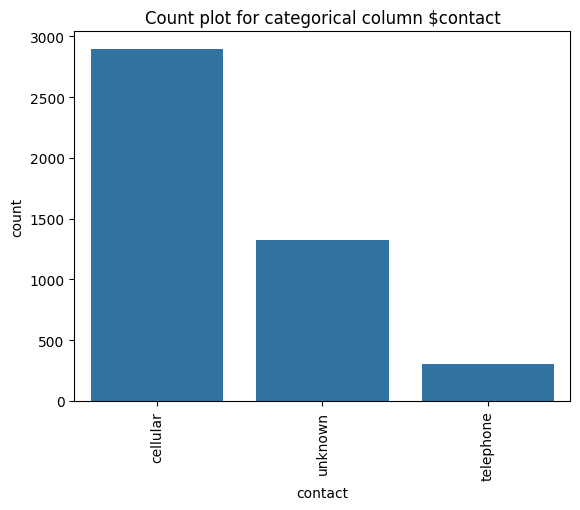

contact
cellular     64.056625
unknown      29.285556
telephone     6.657819
Name: proportion, dtype: float64

In [ ]:
count_plot1(df,'contact')
df['contact'].value_counts(normalize=True).mul(100)

# Number of people contacted using cellular are more

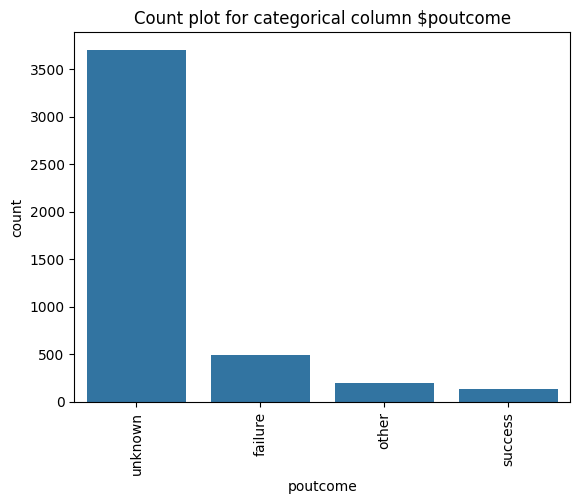

poutcome
unknown    81.950896
failure    10.838310
other       4.357443
success     2.853351
Name: proportion, dtype: float64

In [ ]:
count_plot1(df,'poutcome')
df['poutcome'].value_counts(normalize=True).mul(100)

# Previous Campaign outcome has less impact

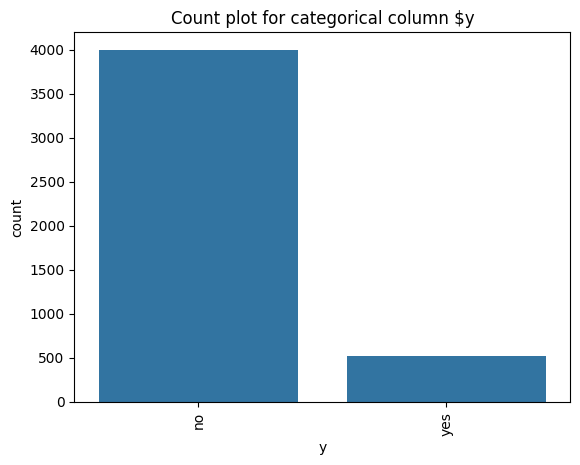

y
no     88.476001
yes    11.523999
Name: proportion, dtype: float64

In [ ]:
count_plot1(df,'y')
df['y'].value_counts(normalize=True).mul(100)

# Less number of people have subscribed a term deposits

In [ ]:
def hist_box_plot(df,column):
    sns.histplot(x=df[column],data=df)
    plt.title(f"Hist plot for numerical column {column}")
    plt.show()   

    sns.boxplot(x=column,data=df)
    plt.title(f"Box plot for numerical column {column}")
    plt.show()   

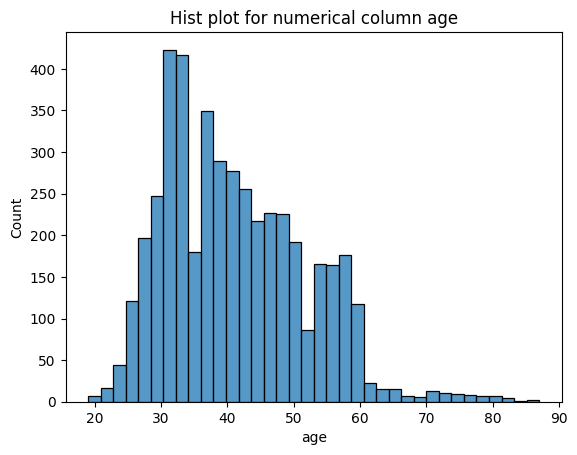

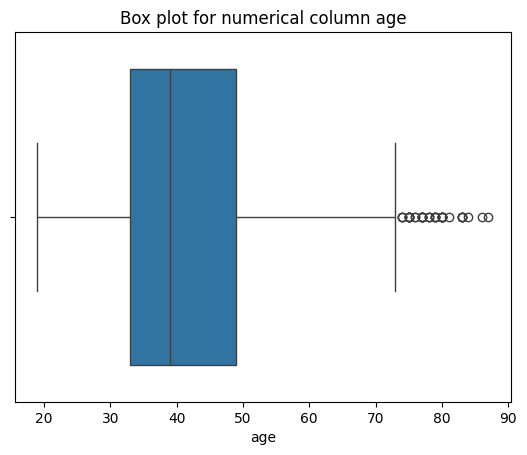

In [ ]:
hist_box_plot(df,'age')

# It is right skewed and few outliers are present

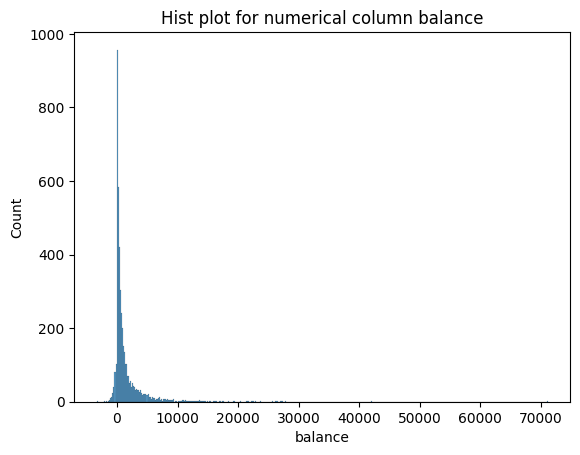

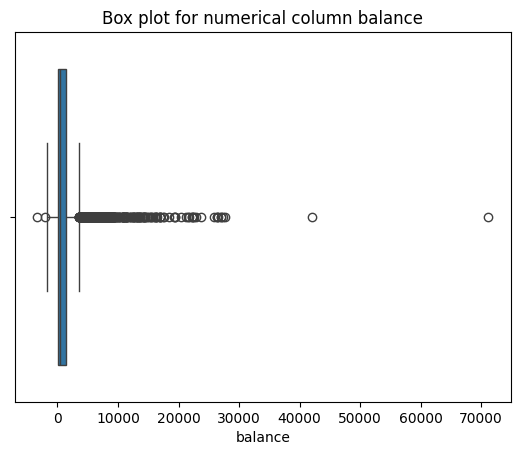

In [ ]:
hist_box_plot(df,'balance')

# It is right skewed and few outliers are present

### 6. Bivariate Analysis (10 marks)
- Analyze the relationship of each independent variable with the target variable.
- Use scatter plots, bar plots, and box plots for visualization.

In [ ]:
def count_plot_bivaraite(df,target_column,column):
    sns.countplot(data=df,x=column,hue=target_column)
    plt.xticks(rotation=90)
    plt.title(f"Plot of {column} vs {target_column}")
    plt.show()

In [ ]:
def hist_box_bivaraite_plot(df,target_column,column):
    sns.histplot(data=df,x=column, hue=target_column,kde=True)
    plt.title(f"Plot of {column} vs {target_column}")
    plt.show()

    sns.boxplot(data=df,x=column,hue=target_column)
    plt.title(f"Plot of {column} vs {target_column}")
    plt.show()

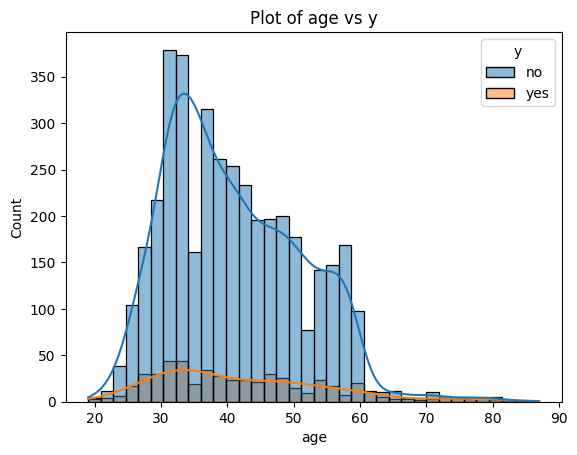

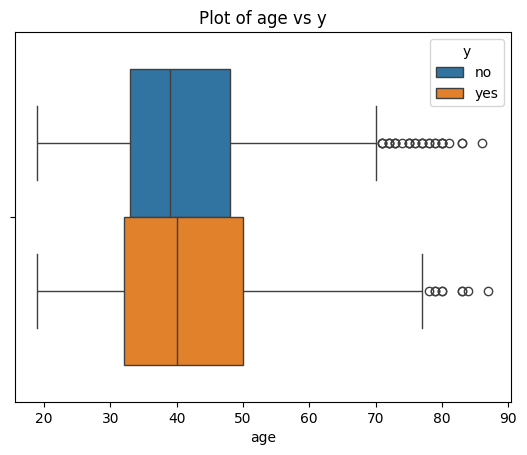

In [ ]:
hist_box_bivaraite_plot(df,'y','age')

#There are outliers in both scenarios
#Distribution is right skewed
#People not having term deposit in all ages is more than having credit


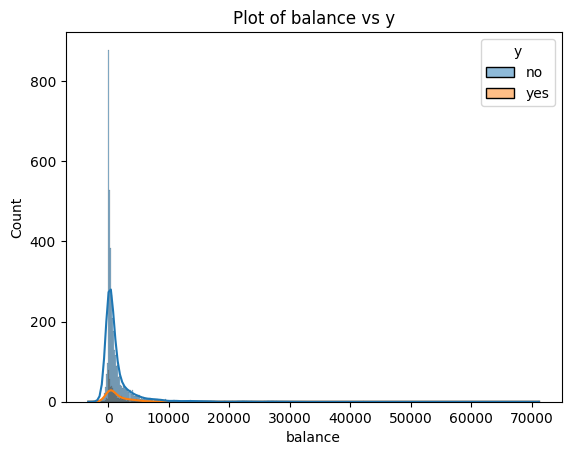

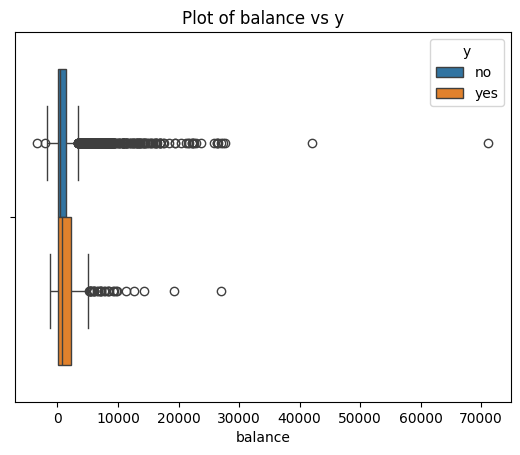

In [ ]:
hist_box_bivaraite_plot(df,'y','balance')

# Balance is not considerable factor in determing term deposit

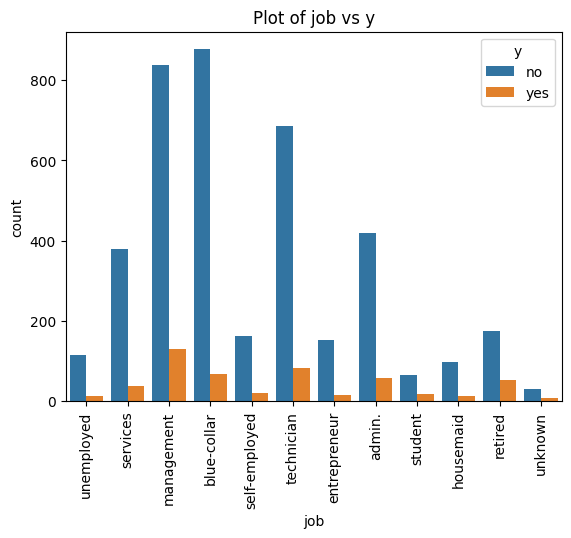

job            y  
admin.         no     87.866109
               yes    12.133891
blue-collar    no     92.706131
               yes     7.293869
entrepreneur   no     91.071429
               yes     8.928571
housemaid      no     87.500000
               yes    12.500000
management     no     86.480908
               yes    13.519092
retired        no     76.521739
               yes    23.478261
self-employed  no     89.071038
               yes    10.928962
services       no     90.887290
               yes     9.112710
student        no     77.380952
               yes    22.619048
technician     no     89.192708
               yes    10.807292
unemployed     no     89.843750
               yes    10.156250
unknown        no     81.578947
               yes    18.421053
Name: proportion, dtype: float64

In [ ]:
count_plot_bivaraite(df,'y','job')
df.groupby('job')['y'].value_counts(normalize=True)*100

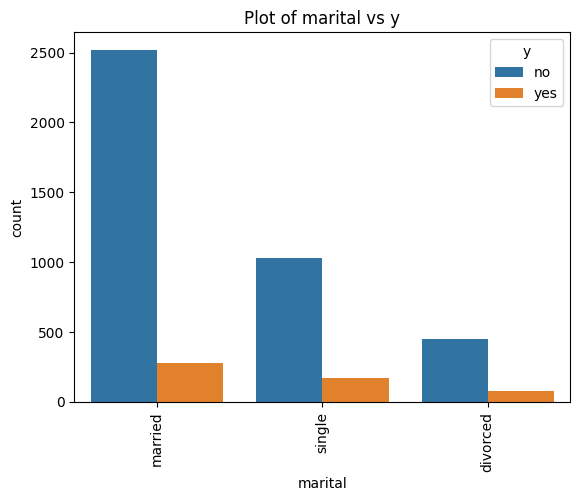

marital   y  
divorced  no     85.416667
          yes    14.583333
married   no     90.096532
          yes     9.903468
single    no     86.036789
          yes    13.963211
Name: proportion, dtype: float64

In [ ]:
count_plot_bivaraite(df,'y','marital')
df.groupby('marital')['y'].value_counts(normalize=True)*100

# People who are signing up for term depost are more in married case when compared to others

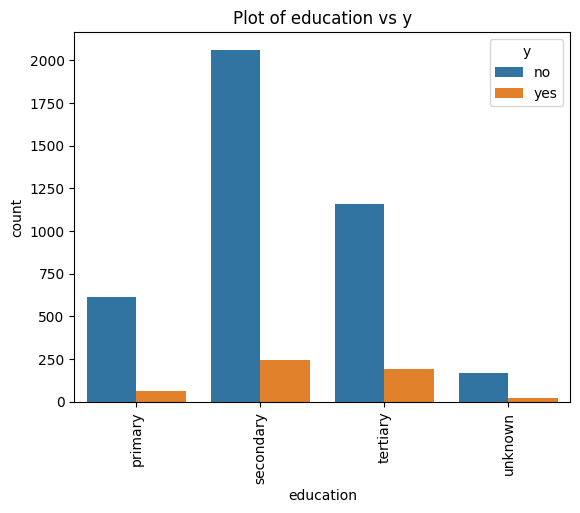

education  y  
primary    no     90.560472
           yes     9.439528
secondary  no     89.375542
           yes    10.624458
tertiary   no     85.703704
           yes    14.296296
unknown    no     89.839572
           yes    10.160428
Name: proportion, dtype: float64

In [ ]:
count_plot_bivaraite(df,'y','education')
df.groupby('education')['y'].value_counts(normalize=True)*100

# People who are signing up for term depost are more in secondary and tertiary case when compared to others

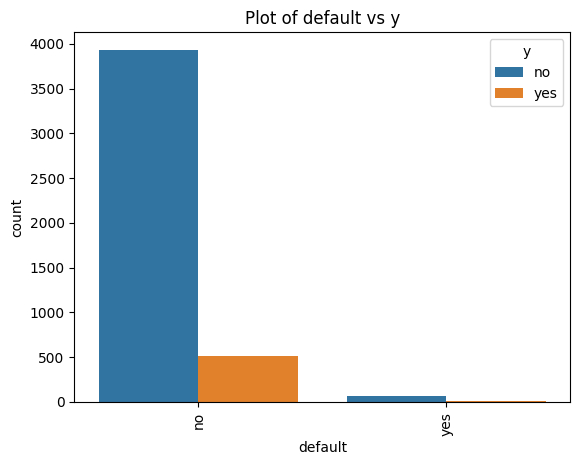

default  y  
no       no     88.481440
         yes    11.518560
yes      no     88.157895
         yes    11.842105
Name: proportion, dtype: float64

In [ ]:
count_plot_bivaraite(df,'y','default')
df.groupby('default')['y'].value_counts(normalize=True)*100

# People who are signing up for term depost are more in the case having no credit by default

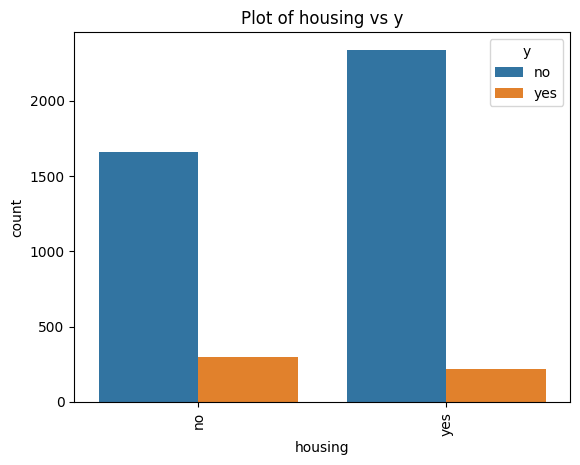

housing  y  
no       no     84.658512
         yes    15.341488
yes      no     91.402892
         yes     8.597108
Name: proportion, dtype: float64

In [ ]:
count_plot_bivaraite(df,'y','housing')
df.groupby('housing')['y'].value_counts(normalize=True)*100



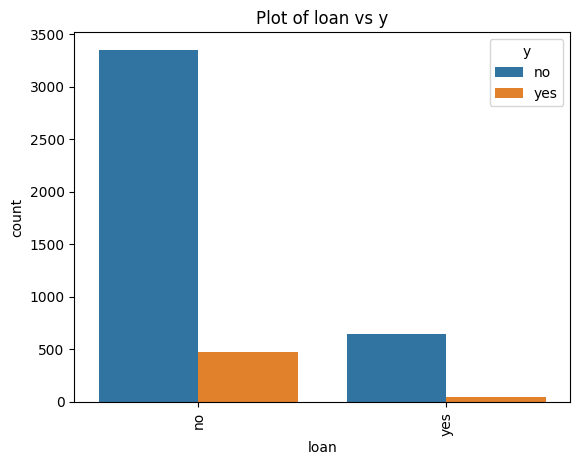

loan  y  
no    no     87.519582
      yes    12.480418
yes   no     93.777135
      yes     6.222865
Name: proportion, dtype: float64

In [ ]:
count_plot_bivaraite(df,'y','loan')
df.groupby('loan')['y'].value_counts(normalize=True)*100



### 7. Multivariate Analysis (10 marks)
- Check for correlations between numerical features.
- Perform pairwise analysis using pair plots or correlation matrices.

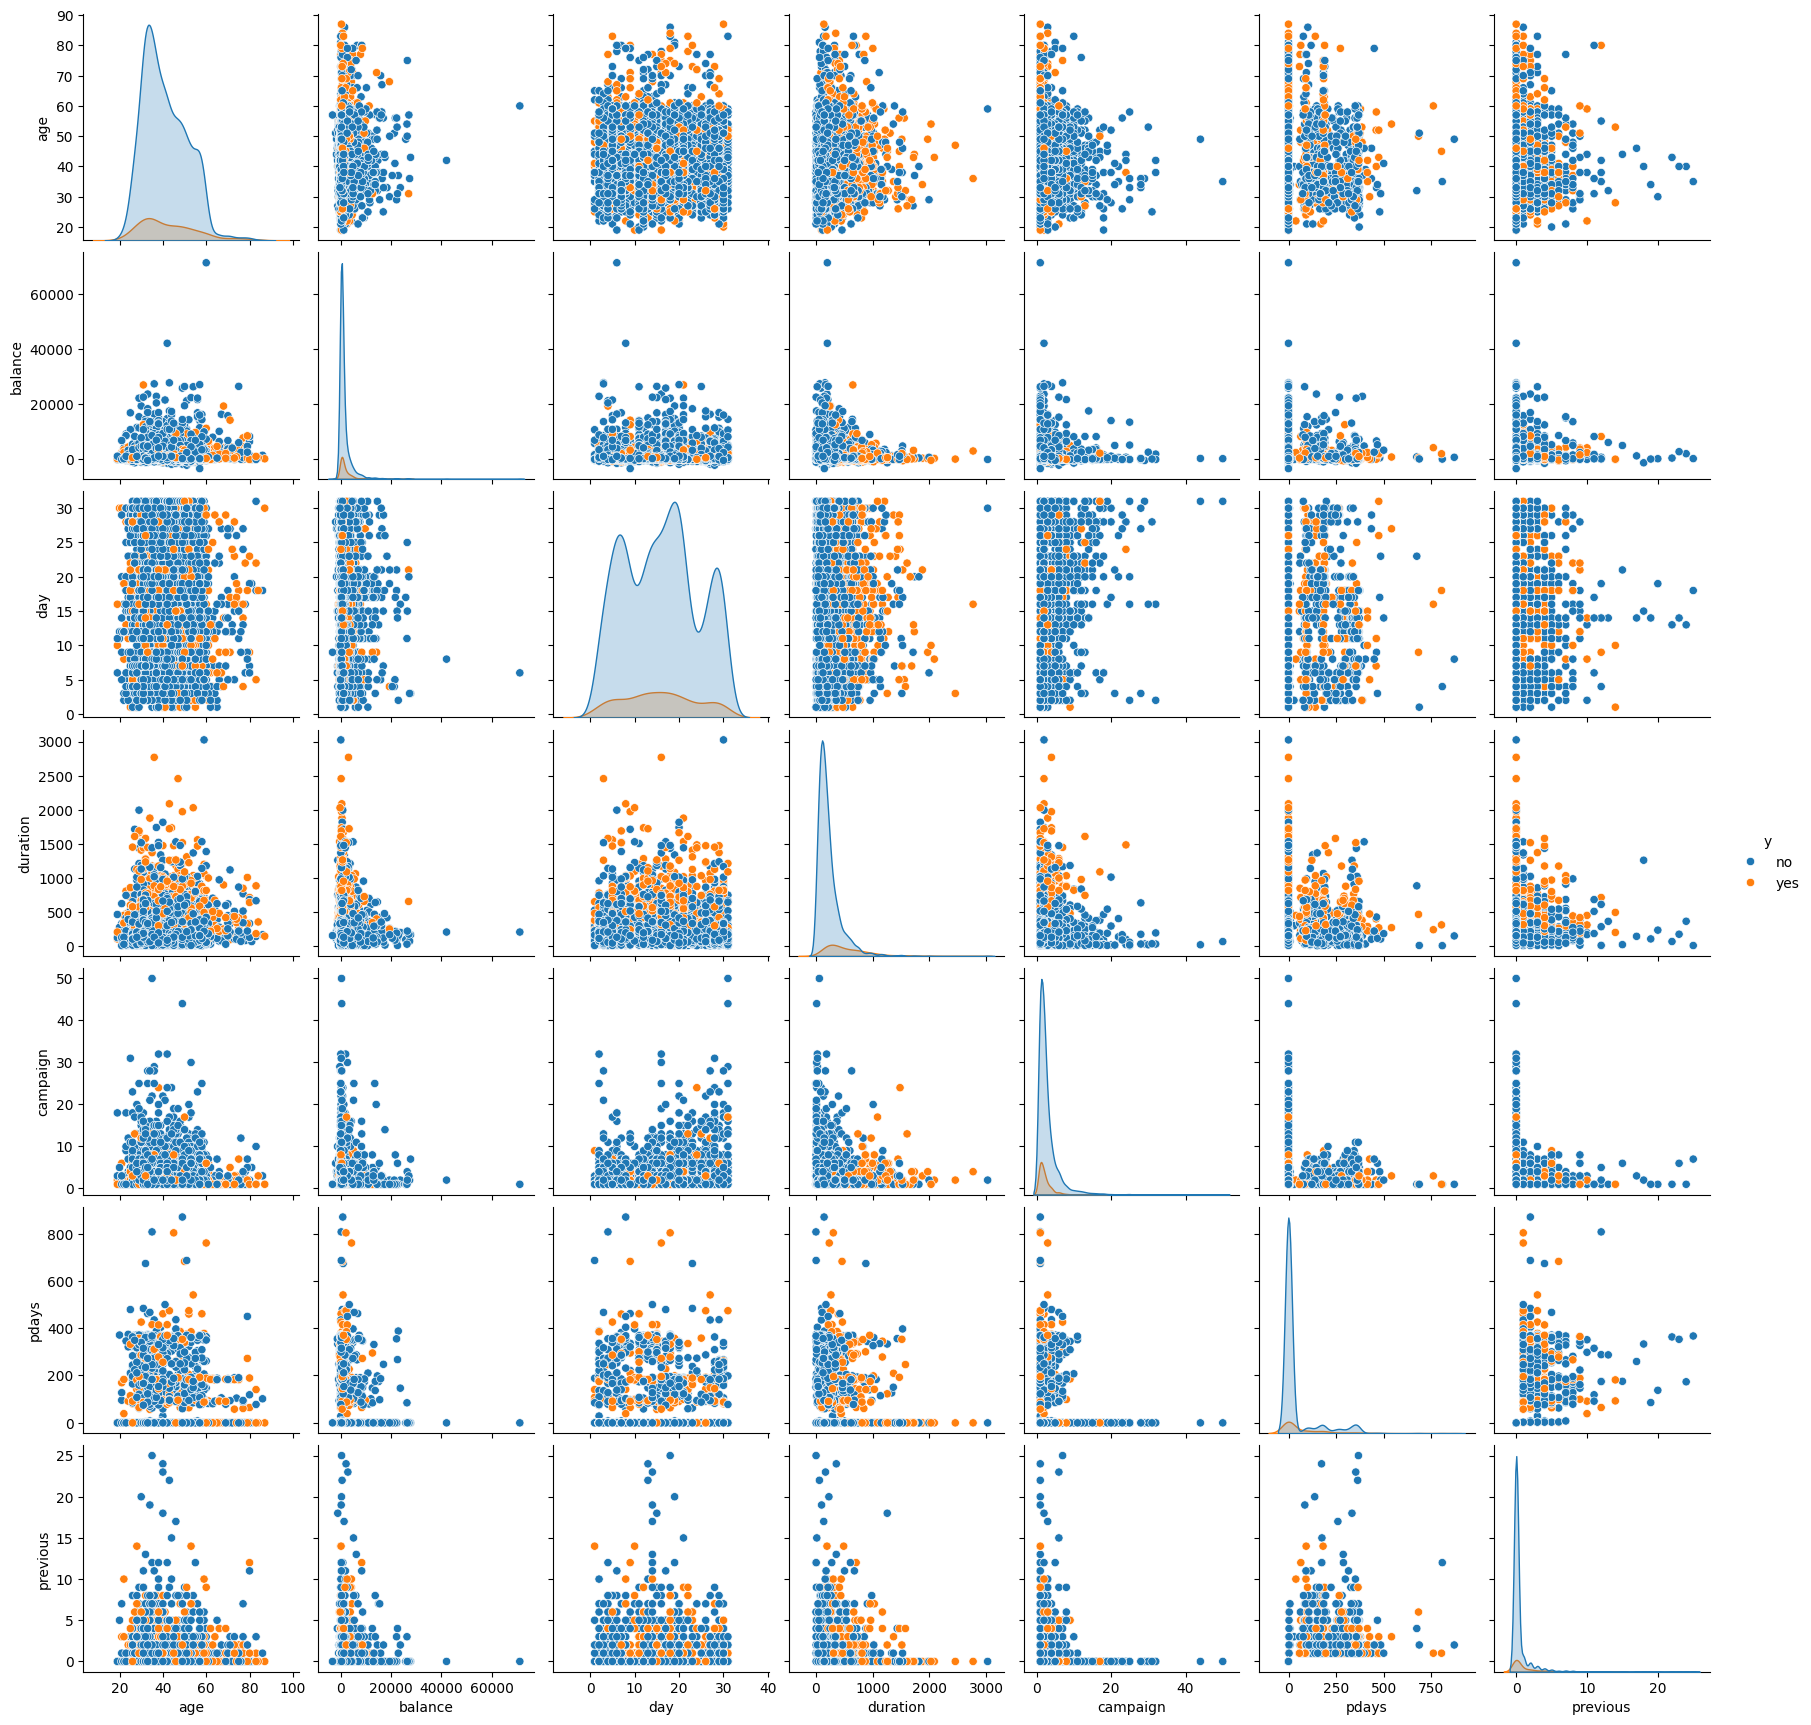

In [ ]:
sns.pairplot(data=df,hue='y')

In [ ]:
new_df = df.copy()
new_df
df['job'].value_counts().unique
job_mapping={
   'management':1,
    'blue-collar':2,
    'technician':3,
    'admin.':4,
    'services':5,
    'retired':6,
    'self-employed':7,
    'entrepreneur':8,
    'unemployed':9,
    'housemaid':10,
    'student':11,
    'unknown':12
}

new_df['job']=df['job'].map(job_mapping)
new_df['marital'].value_counts().unique

marital_mapping={
   'married':1,
    'single':2,
    'divorced':3  
}

new_df['marital']=df['marital'].map(marital_mapping)
df['education'].value_counts().unique

education_mapping={
   'secondary':1,
    'tertiary':2,
    'primary':3,
    'unknown':4 
}

new_df['education']=df['education'].map(education_mapping)
default_mapping={
   'yes':1,
    'no':2
}
new_df['default']=df['default'].map(default_mapping)
housing_mapping={
   'yes':1,
    'no':2
}
new_df['housing']=df['housing'].map(housing_mapping)
loan_mapping={
   'yes':1,
    'no':2
}

new_df['loan']=df['loan'].map(loan_mapping)

contact_mapping={
   'cellular':1,
    'telephone':2,
    'unknown':3  
}

new_df['contact']=df['contact'].map(contact_mapping)

poutcome_mapping={
   'failure':1,
    'success':2,
    'unknown':3,
    'other':4 
}

new_df['poutcome']=df['poutcome'].map(poutcome_mapping)



y_mapping={
   'yes':1,
    'no':0
}

new_df['y']=df['y'].map(y_mapping)

df['month'].value_counts(normalize=True)

month_mapping={
   'jan':1,
    'feb':2,
    'mar':3,
    'apr':4,
    'may':5,
    'jun':6,
    'jul':7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12
}

new_df['month']=df['month'].map(month_mapping)


### 8. Heatmap & Correlation Analysis (10 marks)
- Generate a heatmap to visualize feature correlations.
- Interpret the results to understand feature dependencies.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


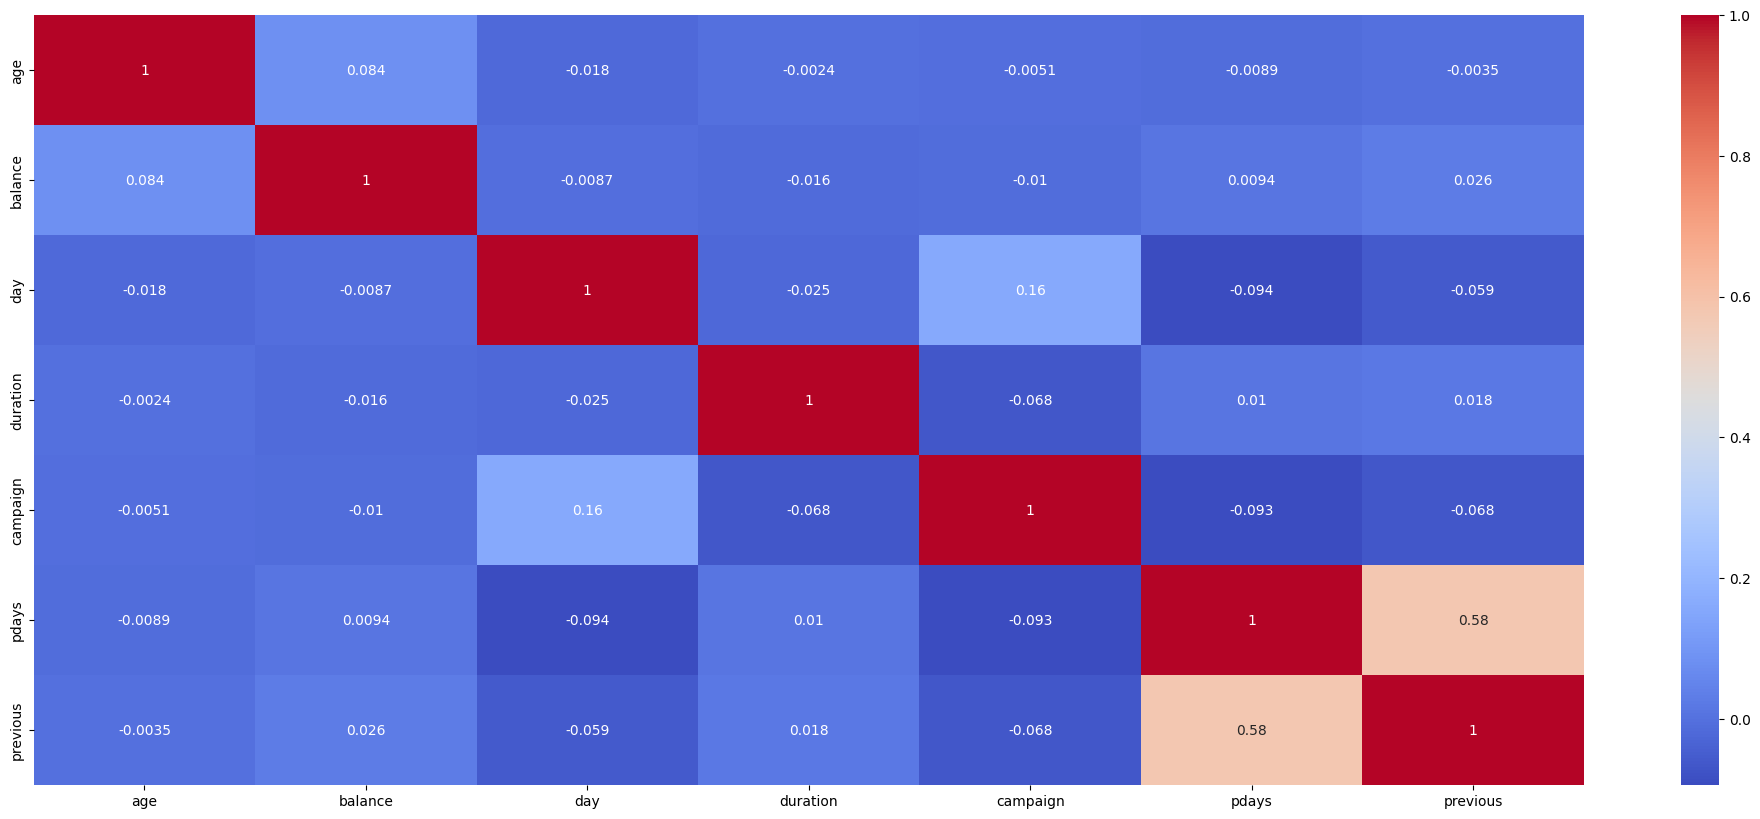

In [ ]:
plt.figure(figsize=(25, 10))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')
df

In [ ]:
def cap_outliers(df,target_column):

    df_capped=df.copy()
    numeric_cols=df.drop(columns=[target_column]).select_dtypes(include='number').columns

    for col in numeric_cols:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound =Q1-1.5 *IQR
        upper_bound=Q3+1.5*IQR

        df_capped[col]=df[col].apply(
            lambda x : lower_bound if x< lower_bound else upper_bound if x>upper_bound else x 
        )

        return df_capped


In [ ]:
from sklearn.preprocessing import LabelEncoder

newdf =cap_outliers(df,'y')





In [ ]:
from sklearn.preprocessing import StandardScaler

def scale_features(df,target_column):

    features=df.drop(columns=[target_column]).select_dtypes(include='number')
    scaler=StandardScaler()
    scaled_array=scaler.fit_transform(features)
    scaled_df=pd.DataFrame(scaled_array,columns=features.columns)
    scaled_df[target_column]=df[target_column].values
    return scaled_df

final_df=scale_features(newdf,target_column='y')
newdf

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33.0,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35.0,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30.0,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59.0,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57.0,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57.0,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28.0,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


### 9. Build Logistic Regression Model (15 marks)
- Split the data into training and testing sets.
- Train a logistic regression model on the training data.
- Display the model coefficients and intercept.

In [ ]:
X=final_df.drop(columns=['y','duration','pdays']).select_dtypes(include='number')
y=final_df['y']

X

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

model=LogisticRegression()
model.fit(X_train,y_train)
# y_pred=model.predict(X_train)
y_pred=model.predict(X_test)

model.score(X_test,y_test)
model.score(X_train,y_train)
model.coef_




array([[ 0.14406948,  0.0051956 ,  0.02776275, -0.3035696 ,  0.2248874 ]])

### 11. Interpretation of Metrics (10 marks)
- Analyze the model's performance based on the evaluation metrics.
- Explain any trade-offs observed in precision and recall.


In [ ]:
model.score(X_test,y_test)


0.8865143699336773

### 10. Model Evaluation (10 marks)
- Generate the confusion matrix.
- Compute accuracy, precision, recall, and F1-score.
- Interpret the classification report.

In [ ]:

print(f"Confusion matrix is {confusion_matrix(y_test,y_pred)}")



Confusion matrix is [[1203    2]
 [ 152    0]]


In [ ]:
from sklearn.metrics import accuracy_score
print(classification_report(y_test,y_pred))
print(f"Accuracy score is {accuracy_score(y_test,y_pred)}")

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1205
           1       0.00      0.00      0.00       152

    accuracy                           0.89      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.79      0.89      0.83      1357

Accuracy score is 0.8872512896094326


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=100)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model.score(X_train,y_train)
model.score(X_test,y_test)

print(f"Confusion matrix {confusion_matrix(y_test,y_pred)}")
print(classification_report(y_test,y_pred))


Confusion matrix [[1205    0]
 [ 152    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1205
           1       0.00      0.00      0.00       152

    accuracy                           0.89      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.79      0.89      0.84      1357



c:\Users\New User\Python\nit\demos\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\New User\Python\nit\demos\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\New User\Python\nit\demos\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [ ]:
from sklearn import tree 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split





dt_clf = tree.DecisionTreeClassifier(max_depth = 4, random_state = 0)   
dt_clf.fit(X_train, y_train) # Train the model

# make predicition
dt_clf.score(X_test, y_test)
y_pred = dt_clf.predict(X_test)

In [ ]:
#measuring model performance 
dt_clf.score(X_test,y_test)

0.894620486366986

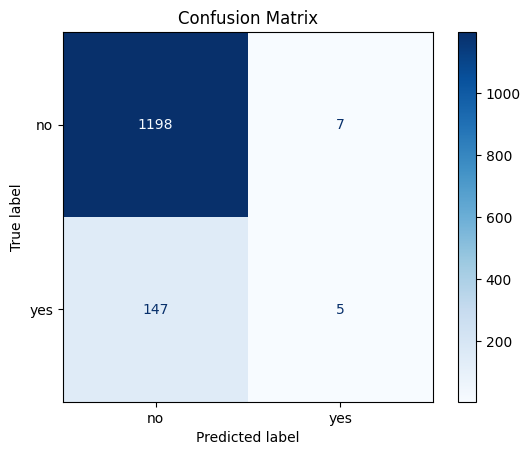

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_clf.classes_)
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1205
           1       0.67      0.12      0.20       152

    accuracy                           0.89      1357
   macro avg       0.78      0.56      0.57      1357
weighted avg       0.87      0.89      0.86      1357



In [ ]:
feature_importance = pd.DataFrame(dt_clf.feature_importances_, index = X_train.columns, columns = ['importance']).sort_values('importance', ascending = False)
feature_importance



,importance
poutcome,0.300424
age,0.237360
previous,0.213613
day,0.074912
month,0.072963
contact,0.060267
housing,0.040461
balance,0.000000
education,0.000000
marital,0.000000



### 12. Final Conclusion (5 marks)
- Summarize the key findings from the analysis.
- Provide suggestions for potential improvements or alternative approaches.

---

In [ ]:
# Data seems to be highly imbalanced due to which recall score is very low